In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [ ]:
## list of columns
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
## Types of dtypes present in the dataframe
set(list(df.dtypes))

{dtype('int64'), dtype('float64'), dtype('O')}

In [ ]:
## to identify which columns has the "Object" data
categorical_columns=[col for col in df.columns if df[col].dtype=="O"]
categorical_columns

[' Label']

In [ ]:
## Categorical Data
df_Categorical=df[categorical_columns]
df_Categorical

,Label
0,BENIGN
1,BENIGN
2,BENIGN
3,BENIGN
4,BENIGN
...,...
191028,BENIGN
191029,BENIGN
191030,BENIGN
191031,BENIGN


In [ ]:
# Numerical data
df_Numerical=df.copy()
df_Numerical.drop([" Label"],axis=1,inplace=True)
## cols = df.select_dtypes(include=['float64','int64']).columns

df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,3,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,0,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0


(BENIGN    189067
 Bot         1966
 Name:  Label, dtype: int64,
 <Axes: xlabel=' Label', ylabel='count'>)

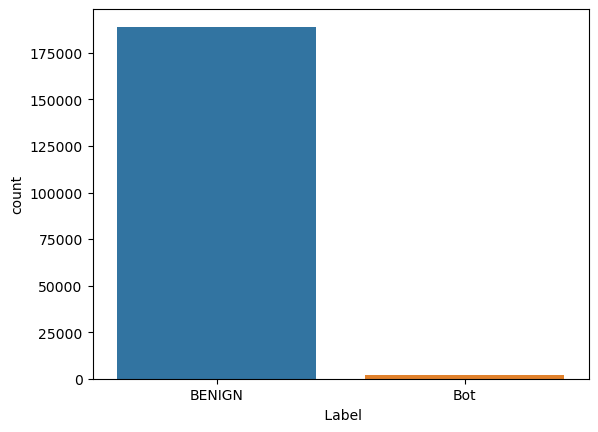

In [ ]:
##  To check the Counts of each Class in the dependent Variable
df_Categorical[" Label"].value_counts(),sns.countplot(x=df_Categorical[' Label'])

In [ ]:
## To check Unique values in the data 
for i in df_Numerical.columns:
    #if df[i].unique()<
    print(f" {i} Column has {df[i].nunique()} unique values and those are {df[i].unique()}\n\n")

  Destination Port Column has 16089 unique values and those are [ 3268   389     0 ...  4997 33279 33280]


  Flow Duration Column has 91470 unique values and those are [112740690 112740560 113757377 ...  60921076 116036371     16842]


  Total Fwd Packets Column has 505 unique values and those are [    32    545     22      4      7      1      9     13     11     21
     20      2     25      3     48     46    460    388      6     49
    206     14     24     19     27    124    360     12     10      8
    132      5     33    270     15     39    171     16     43     64
    380    108     36     17     38     35    264    252     28     18
     96     29     82     23    156   1161    468     98     53    343
   3694   1227    120     41     68     52     30     26     37    653
     62     54     55     47    106     57    138     86     83     67
    131     79     69     45   1303     63    105    118     81     40
    134     34     31     70     72     61     74   3799    2

In [ ]:
for i in df_Numerical.columns:
    if df[i].isnull().sum()>0:
        print(i)

Flow Bytes/s


In [ ]:
## We are having nan values in this column
df_Numerical["Flow Bytes/s"].isnull().sum()

28

In [ ]:
## To check the dependent column data , when the data is nan
#nan_rows = df[df["Flow Bytes/s"].isnull()]
for index, row in df_Numerical.iterrows():
    if pd.isna(row["Flow Bytes/s"]):
        print(row["Flow Bytes/s"],df_Categorical[" Label"].iloc[index])

nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN


## from the above data we can see that Dependent column data for missing rows are Normal or BENIGN , so we are going to delete all rows ,because it is only small numbers, Total 28 Rows of missing rows are deleted

In [ ]:
## Drop the nan values 
df_Numerical.dropna(inplace=True)

## To check the  Dataframe has infinte values or not

In [ ]:

## To check this funtion all columns should be numerical data types like int,float  should not include "Object datatype"
np.all(np.isfinite(df_Numerical.values))

False

### From this we funtion , the data contains np.inf value ie, Infinity value in the data

In [ ]:
## To check total sum of the infinite values in the data
np.isinf(df_Numerical).values.sum()
## To check all values of dataframe are finite
#np.all(np.isfinite(df.values))
#np.all(np.isinf(df))

188

## Count how many of these values belongs to BENIGN OR BOT

In [ ]:
#infintie_column_list=[]
#count={}
#list1=df_Numerical.columns
#for index,row in df_Numerical.iterrows():
 #   for j in list1:
  #      if np.isfinite(row[j])==False:
 #           infintie_column_list.append(j)
  #          count[j]=
    #        print(f" This column '{j}' has infinity value in {index} ,this looks like {row[j]}\n")#

In [ ]:
#infinite_column_list = []

# Iterate through the rows of the DataFrame
#for index, row in df_Numerical.iterrows():
 #   for column in df_Numerical.columns:
#        if not np.isfinite(row[column]):
            # Add the column name to the list of columns with infinite values
  #          infinite_column_list.append(column)
            #print(f"Row {index}: Column '{column}' has infinite value: {row[column]}")

# Remove duplicates from the list of columns with infinite values
#infinite_column_list = list(set(infinite_column_list))

# Print the list of columns with infinite values
#print("\nColumns with infinite values:")
#print(infinite_column_list)


## To know which columns have ifninity values and how many numbers are there and also their index number 

In [ ]:
import numpy as np

infinite_column_count = {}  # Dictionary to store counts
infinite_Value_index_num = []  # List to store index numbers

# Iterate through the columns
for column in df_Numerical.columns:
    count = 0  # Initialize count for the current column
    for index, value in enumerate(df_Numerical[column]):
        if not np.isfinite(value):
            count += 1  # Increment count for non-numeric (infinite) values
            infinite_Value_index_num.append(index)  # Append the index number
    if count > 0:
        infinite_column_count[column] = count  # Store count in the dictionary

# Convert the list of index numbers to a set to remove duplicates
infinite_Value_index_num = set(infinite_Value_index_num)

# Print the dictionary and the set of index numbers
print("Counts of non-numeric (infinite) values in each column:")
print(f"{infinite_column_count}\n")

print("Index numbers of non-numeric (infinite) values:")
print(infinite_Value_index_num)


Counts of non-numeric (infinite) values in each column:
{'Flow Bytes/s': 94, ' Flow Packets/s': 94}

Index numbers of non-numeric (infinite) values:
{11778, 188931, 163844, 57872, 134161, 99347, 121373, 51746, 135208, 105006, 134190, 168500, 106551, 4153, 64057, 117825, 143945, 604, 106596, 87655, 48239, 38005, 13950, 61066, 170122, 75916, 76428, 106638, 4752, 25233, 186009, 28314, 81055, 118442, 29367, 90305, 85699, 3786, 118987, 70348, 190155, 75983, 14039, 12503, 39129, 172761, 37606, 41704, 23785, 42730, 112367, 116984, 83704, 127745, 145671, 61710, 24344, 13093, 107301, 79148, 41265, 40756, 68916, 110916, 33623, 36700, 100188, 14183, 9581, 63853, 114031, 4466, 131978, 30603, 31115, 161688, 154012, 37281, 47522, 126379, 34223, 113071, 124338, 33718, 177098, 45515, 132555, 173003, 16846, 17874, 40405, 33773, 34802, 125944}


In [ ]:
Benign=0
bot=0
for i in infinite_Value_index_num:
    if df_Categorical[" Label"].iloc[i]=="BENIGN":
        Benign+=1
    else:
        bot+=1
        
print(f" Benign counts are {Benign}\n\n")
print(f" bot counts are {bot}")

 Benign counts are 94


 bot counts are 0


## Since we only have 188 rows which has "inf" data , Compared to all the data we have , this data is less so we can delete the rows 
Note: We can try to replace this values with Maximum value based on accuracy of the model

In [ ]:
## Replace the infinite values with nan values and then delete each row 
df_Numerical.replace([np.inf, -np.inf], np.nan, inplace=True)
df_Numerical.dropna(inplace=True)

In [ ]:
## To confirm once again is there any nan or infinite values
## To check total sum of the infinite values in the data
#np.isinf(df_Numerical).values.sum(),np.any(np.isnan(df_Numerical))
np.all(np.isinf(df_Numerical)),np.any(np.isnan(df_Numerical))

(False, False)

In [ ]:
# To check is there any nan values 
#np.any(np.isnan(df)),  np.all(np.isfinite(df))
#np.isfinite(df[' Destination Port'].iloc[1])

### There is no nan values and there are all finite values

In [ ]:
df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,3,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,0,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0


In [ ]:
df_Numerical.shape,df_Categorical.shape

((190911, 78), (191033, 1))

### Since we have deleted some rows in the Numerical data, we want that data in the Categorical data ,Thats why the rows size is different in both

In [ ]:
# Create a list of index numbers from df_Numerical
index_numbers_to_fetch = df_Numerical.index.tolist()

# Fetch the corresponding rows from df_Categorical
df_Categorical = df_Categorical.loc[index_numbers_to_fetch]

# df_Categorical_subset now contains the rows from df_Categorical that correspond to the index numbers in df_Numerical

In [ ]:
df_Categorical.shape

(190911, 1)

## Convert the Dependent data into Numerical using One hot Encoding 

In [ ]:
## Dependent data 
y=pd.get_dummies(data=df_Categorical[" Label"], drop_first=True)
y

,Bot
0,0
1,0
2,0
3,0
4,0
...,...
191028,0
191029,0
191030,0
191031,0


In [ ]:
# Independent data
df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,3,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,0,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0


## we can see that all features values are in different scaling , so we can scale down using min max scaler or Standarization

In [ ]:
df_Numerical_Scaled_data=pd.DataFrame()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_Numerical_Scaled_data[df_Numerical.columns] = scaler.fit_transform(df_Numerical[df_Numerical.columns])

In [ ]:
df_Numerical_Scaled_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.050317,0.939506,0.000149,0.000056,0.005220,1.837321e-06,0.016237,0.000000,0.033918,0.029041,...,0.000076,0.571429,0.000003,2.380559e-07,0.000004,3.235849e-06,0.134167,0.006512,0.136667,0.128333
1,0.005989,0.939505,0.000149,0.000056,0.005220,8.063796e-06,0.016237,0.000000,0.033918,0.029041,...,0.000076,0.571429,0.000003,3.124006e-07,0.000003,2.688679e-06,0.134167,0.006512,0.136667,0.128333
2,0.000000,0.947978,0.002616,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.088319,1.453303e-01,0.178302,1.792453e-07,0.101667,0.090546,0.173333,0.045875
3,0.082451,0.000834,0.000101,0.000000,0.000499,0.000000e+00,0.001128,0.012043,0.004713,0.000000,...,0.000106,0.571429,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000456,0.000014,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190906,0.000816,0.000512,0.000014,0.000007,0.000146,5.645933e-07,0.001813,0.019355,0.007575,0.000000,...,0.000015,0.357143,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
190907,0.000816,0.000002,0.000005,0.000007,0.000065,4.338118e-07,0.001612,0.017204,0.006733,0.000000,...,0.000005,0.571429,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
190908,0.000816,0.000002,0.000005,0.000007,0.000073,5.645933e-07,0.001813,0.019355,0.007575,0.000000,...,0.000005,0.571429,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
190909,0.001894,0.000140,0.000000,0.000004,0.000039,7.655502e-08,0.001934,0.020645,0.008080,0.000000,...,0.000000,0.357143,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000


## Now All the values are in one scale , so we can feed this data into model

In [ ]:
## Dependent data
X=df_Numerical_Scaled_data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
## The size of Train and test data
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((127910, 78), (127910, 1), (63001, 78), (63001, 1))

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
## Train the model with training data
logistic_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
## Get prediction for testing data(X_Test)
y_pred = logistic_model.predict(X_test)

In [ ]:
from sklearn.metrics import *
## Compare both y_pred and y_test
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)
print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 99.14604530086824
Confusion Matrix
[[62290    49]
 [  489   173]]


## Fitting Different Models

In [ ]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import *
from sklearn.tree import *
 ## Cross Validation score by using K-fold Cross validation
#scores = cross_val_score(v, X_train, y_train, cv=10)
#classification = metrics.classification_report(y_train, v.predict(X_train))


## Compared to all Models The Decision Tree Classifier is Giving the Best Results , which is having high F1-Score for both class and also Confusion Matrix is also good

In [ ]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

## Write Funtions To Split the data and then Train the model and then Evaluate the model

# For Quick Analysis and Results

In [ ]:
# Function to split data into training and testing sets
def split_data(X, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Function to train a classification model
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)

# Function to evaluate a classification model
def evaluate_model(model, X, y, dataset_name):
    accuracy = accuracy_score(y, model.predict(X))
    confusion_matrix_result = confusion_matrix(y, model.predict(X))
    classification = classification_report(y, model.predict(X))
    
    print(f'============================== {dataset_name} Model Evaluation ==============================')
    print()
    print("Model Accuracy:\n", accuracy)
    print()
    print("Confusion matrix:\n", confusion_matrix_result)
    print()
    print("Classification report:\n", classification)
    print()

    
models = [
    ('Naive Baye Classifier', BernoulliNB()),
    ('Decision Tree Classifier', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
    ('LogisticRegression', LogisticRegression(n_jobs=-1, random_state=0))
]

# Iterate through models
for model_name, model in models:
    train_model(model, X_train, y_train)
    evaluate_model(model, X_train, y_train, f'Training - {model_name}')
    evaluate_model(model, X_test, y_test, f'Test - {model_name}')

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


============================== Training - Naive Baye Classifier Model Evaluation ==============================

Model Accuracy:
 0.8745446016730514

Confusion matrix:
 [[110588  16028]
 [    19   1275]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    126616
           1       0.07      0.99      0.14      1294

    accuracy                           0.87    127910
   macro avg       0.54      0.93      0.53    127910
weighted avg       0.99      0.87      0.92    127910


============================== Test - Naive Baye Classifier Model Evaluation ==============================

Model Accuracy:
 0.8751765844986588

Confusion matrix:
 [[54485  7854]
 [   10   652]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93     62339
           1       0.08      0.98      0.14       662

    accuracy                           0.88     63001
   m

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


============================== Training - KNeighborsClassifier Model Evaluation ==============================

Model Accuracy:
 0.9986240325228677

Confusion matrix:
 [[126513    103]
 [    73   1221]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    126616
           1       0.92      0.94      0.93      1294

    accuracy                           1.00    127910
   macro avg       0.96      0.97      0.97    127910
weighted avg       1.00      1.00      1.00    127910


============================== Test - KNeighborsClassifier Model Evaluation ==============================

Model Accuracy:
 0.9980159045094522

Confusion matrix:
 [[62271    68]
 [   57   605]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     62339
           1       0.90      0.91      0.91       662

    accuracy                           1.00     63001
   mac

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


============================== Training - LogisticRegression Model Evaluation ==============================

Model Accuracy:
 0.9916425611758267

Confusion matrix:
 [[126536     80]
 [   989    305]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    126616
           1       0.79      0.24      0.36      1294

    accuracy                           0.99    127910
   macro avg       0.89      0.62      0.68    127910
weighted avg       0.99      0.99      0.99    127910


============================== Test - LogisticRegression Model Evaluation ==============================

Model Accuracy:
 0.9914604530086824

Confusion matrix:
 [[62290    49]
 [  489   173]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     62339
           1       0.78      0.26      0.39       662

    accuracy                           0.99     63001
   macro a

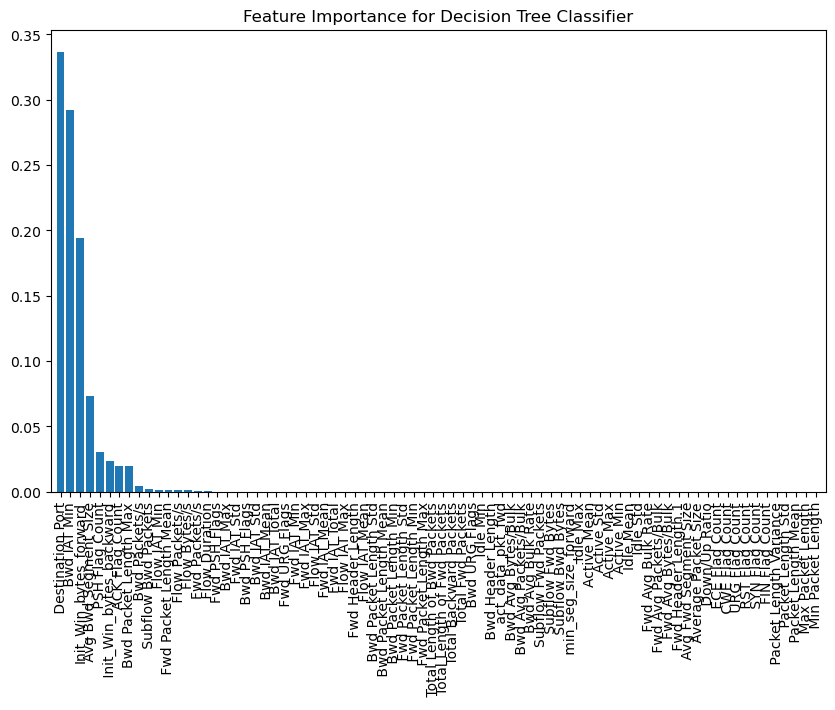

In [ ]:
# Visualize feature importance for tree-based models
for model_name, model in models:
    if 'Decision Tree' in model_name or 'Random Forest' in model_name:
        importances = model.feature_importances_
        feature_names = X.columns
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance for {model_name}')
        plt.bar(range(X.shape[1]), importances[indices], align='center')
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.show()


# To explore every results metrics of each model and to store  all results  in dataframe 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Functions for Splitting data, training and evaluating data

In [ ]:
# Function to split data into training and testing sets
def split_data(X, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Function to train a classification model
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)

# Function to evaluate a classification model
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    
    accuracy = accuracy_score(y, y_pred)
    confusion_matrix_result = confusion_matrix(y, y_pred)
    classification = classification_report(y, y_pred)
    f1 = f1_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    
    return {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix_result,
        'classification_report': classification,
        'f1_score': f1,
        'precision': precision,
        'recall': recall
    }

## For Visualisations
-  ROC Curve
-  Precision-Recall Curve

In [ ]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for {}'.format(model_name))
    plt.legend(loc='lower right')
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(precision, recall, auc, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(auc))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for {}'.format(model_name))
    plt.legend(loc='lower left')
    plt.show()


## Create a dataframe and store each results in  that dataframe and then also plot the above plots while iterating throgh models , also we can iterate separately to plot these plots

### Note: We can add Ensemble and all type of Classfication models to get the result

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_32/2511535828.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


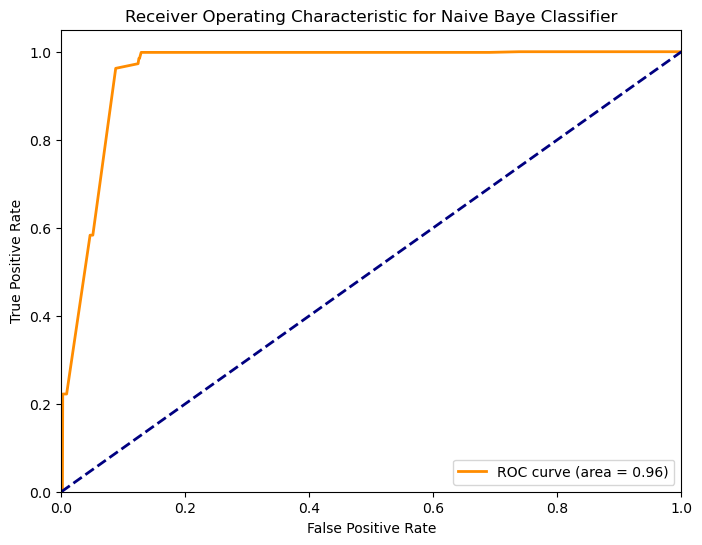

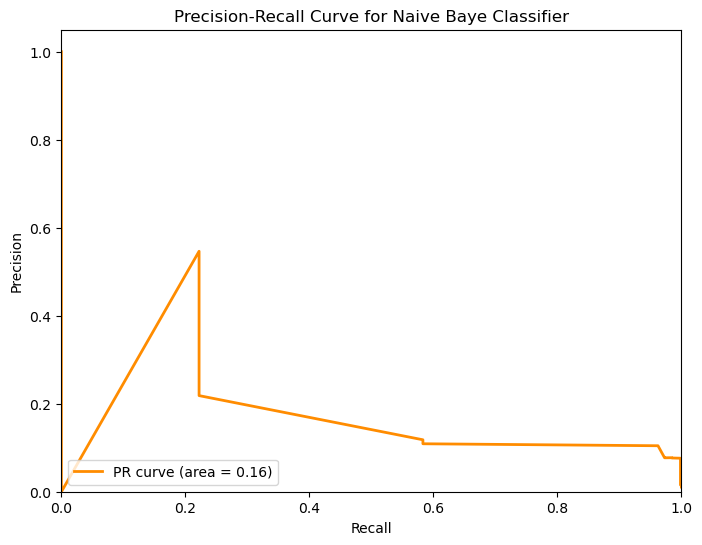

/tmp/ipykernel_32/2511535828.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


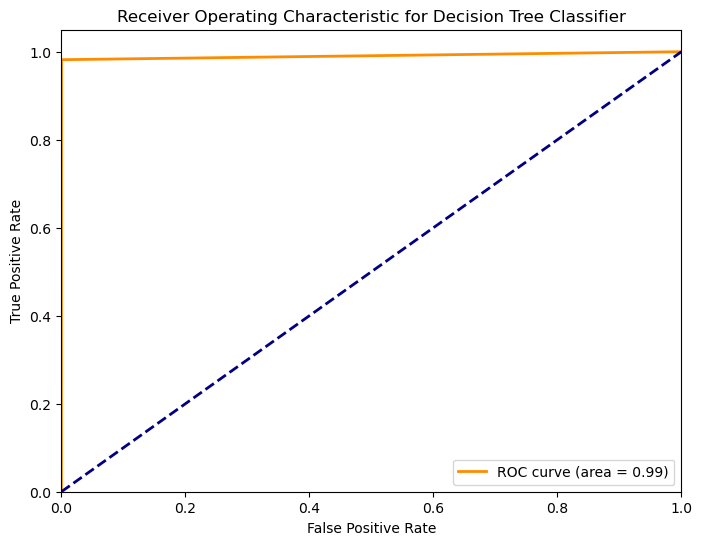

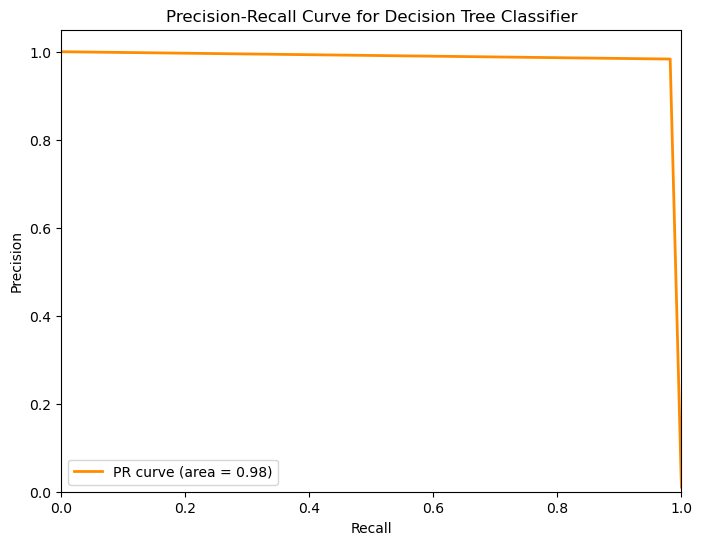

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/tmp/ipykernel_32/2511535828.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


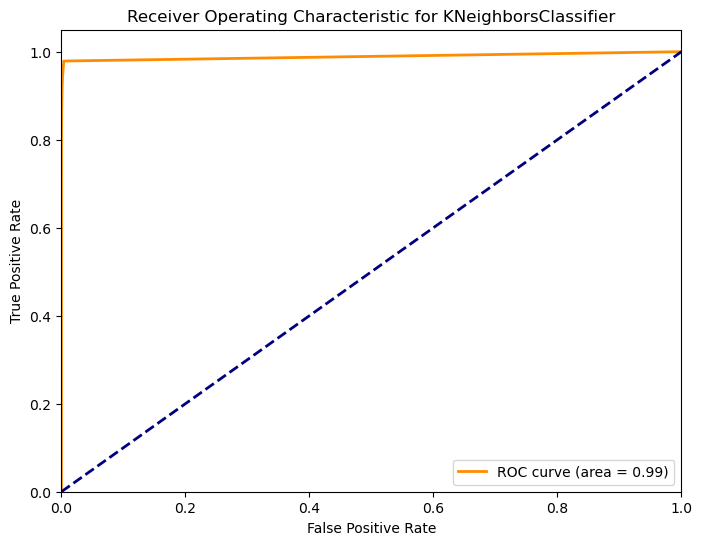

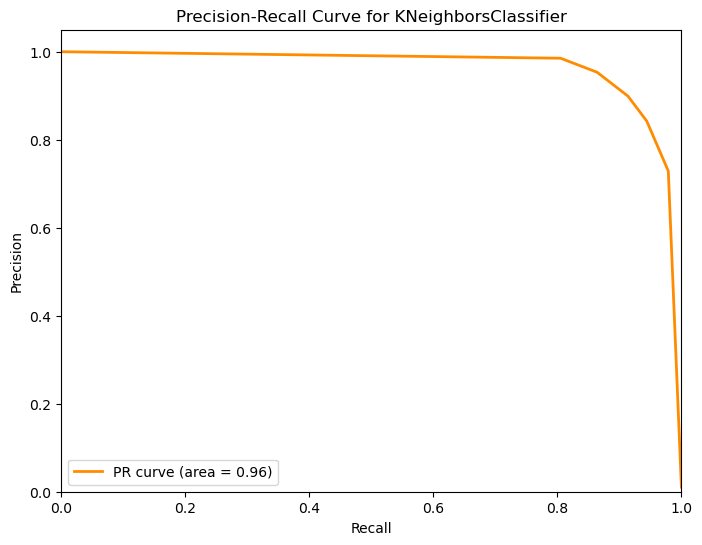

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_32/2511535828.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


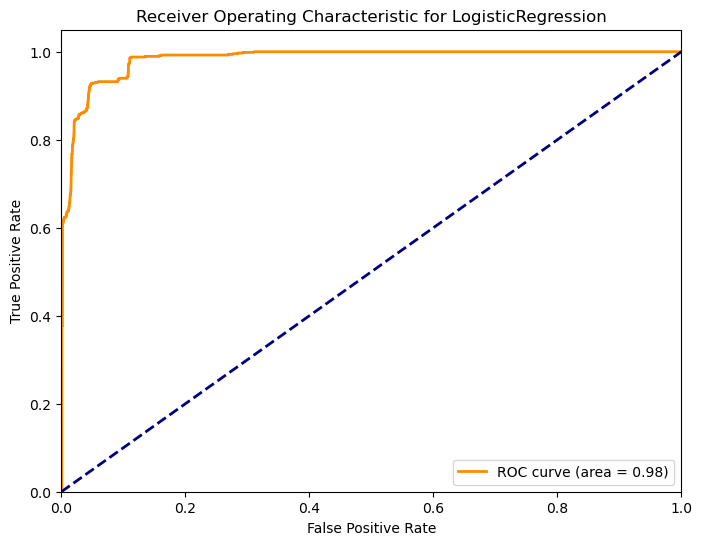

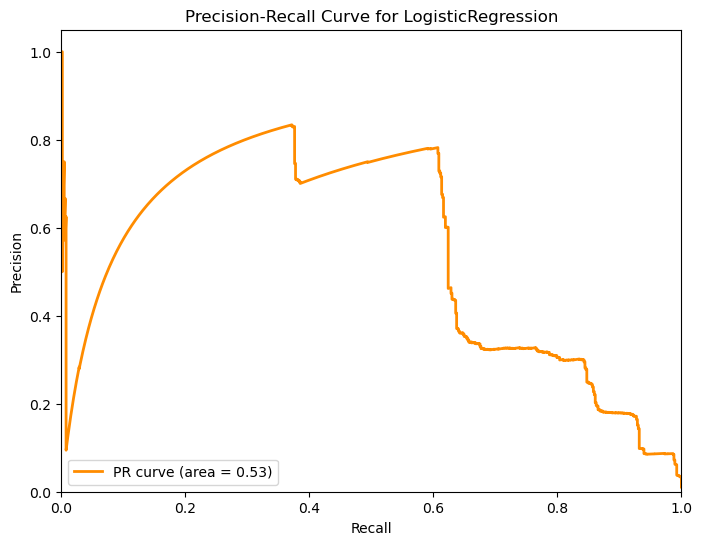

/tmp/ipykernel_32/2510329330.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/tmp/ipykernel_32/2511535828.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


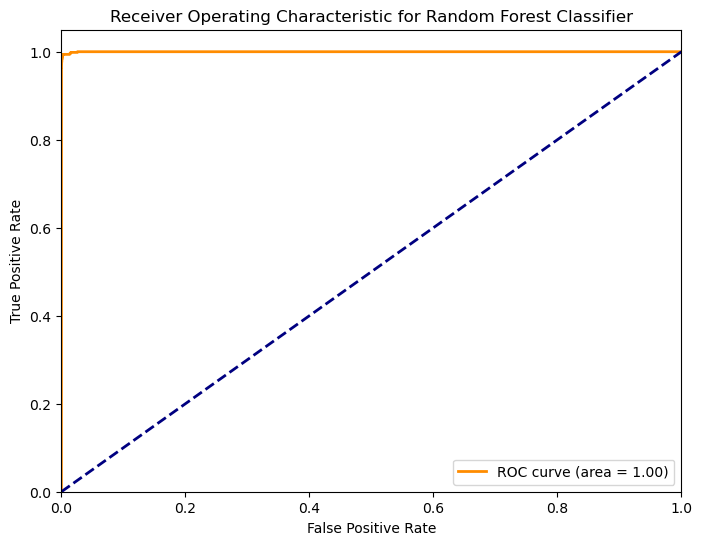

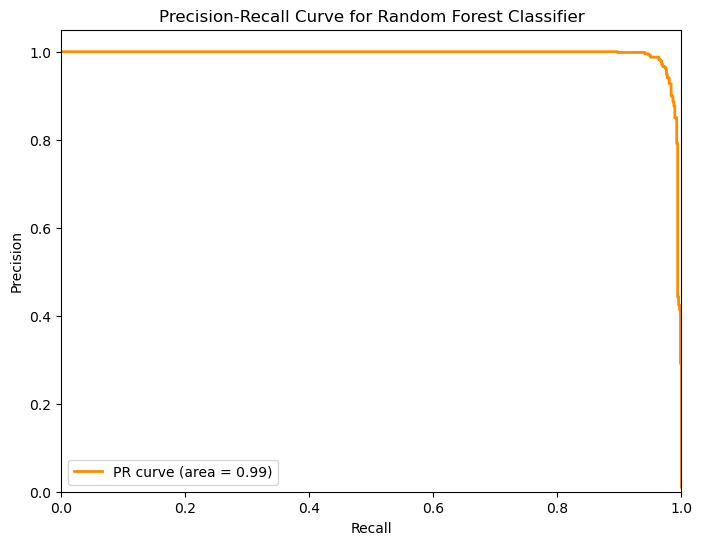

                      Model  Train Accuracy  Test Accuracy  F1 Score  \
0     Naive Baye Classifier        0.874545       0.875177  0.142234   
1  Decision Tree Classifier        1.000000       0.999635  0.982615   
2      KNeighborsClassifier        0.998624       0.998016  0.906367   
3        LogisticRegression        0.991643       0.991460  0.391403   
4  Random Forest Classifier        0.999273       0.998794  0.939103   

   Precision    Recall  
0   0.076652  0.984894  
1   0.983359  0.981873  
2   0.898960  0.913897  
3   0.779279  0.261329  
4   1.000000  0.885196  


In [ ]:
# Load your dataset, assuming you have a DataFrame 'data' and the target column is 'target'
# X = data.drop(columns=['target'])
# y = data['target']

# Split the data
# X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, random_state=42)

# Create a list of classification models
models = [
    ('Naive Baye Classifier', BernoulliNB()),
    ('Decision Tree Classifier', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
    ('LogisticRegression', LogisticRegression(n_jobs=-1, random_state=0)),
    ('Random Forest Classifier', RandomForestClassifier(n_jobs=-1, random_state=0)),
]

# DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall'])

# Iterate through models
for model_name, model in models:
    train_model(model, X_train, y_train)
    train_evaluation = evaluate_model(model, X_train, y_train)
    test_evaluation = evaluate_model(model, X_test, y_test)

    # Store results in the DataFrame
    results_df = results_df.append({
        'Model': model_name,
        'Train Accuracy': train_evaluation['accuracy'],
        'Test Accuracy': test_evaluation['accuracy'],
        'F1 Score': test_evaluation['f1_score'],
        'Precision': test_evaluation['precision'],
        'Recall': test_evaluation['recall'],
    }, ignore_index=True)
    
    
    # Calculate ROC and Precision-Recall curves
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    
    # Plot ROC curve and Precision-Recall curve
    plot_roc_curve(fpr, tpr, roc_auc, model_name)
    plot_precision_recall_curve(precision, recall, pr_auc, model_name)

# Print results
print(results_df)

## To compare Training and testing accuracy of each model

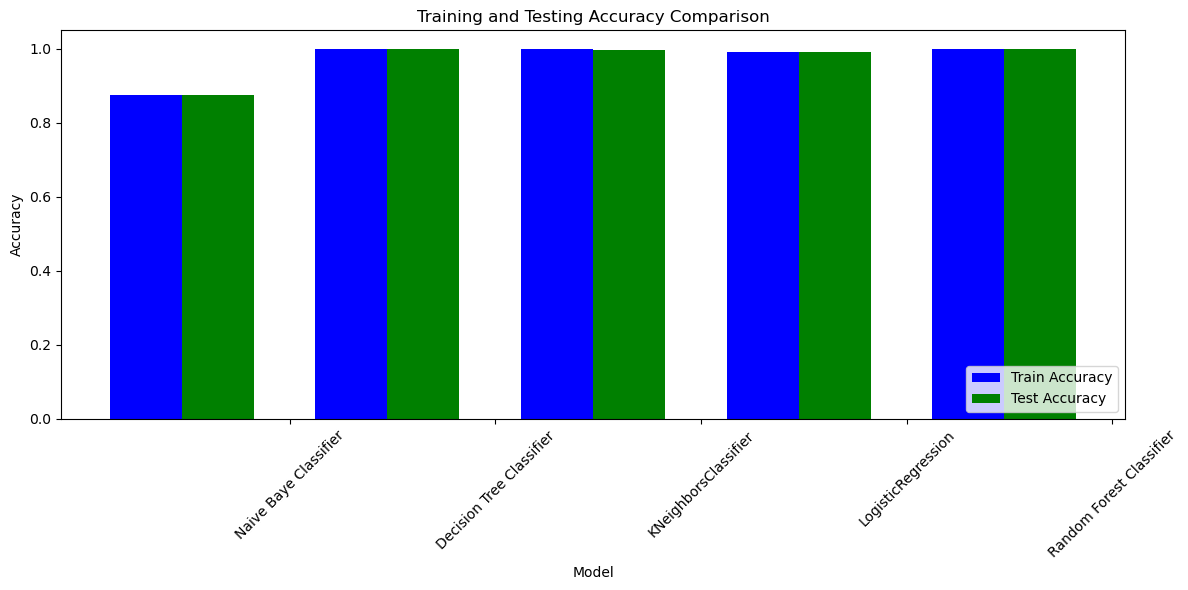

In [ ]:
# ... (previous code remains the same)

# Create a grouped bar plot for comparing training and testing accuracy for each model
accuracy_metrics = ['Train Accuracy', 'Test Accuracy']
model_names = results_df['Model']
num_models = len(models)

# Set the width of each bar
bar_width = 0.35  # Adjusted the bar width to center the bars

# Generate an array of indices for the x-axis
indices = np.arange(len(model_names))

# Create a color map for different accuracy metrics
colors = ['b', 'g']

plt.figure(figsize=(12, 6))

for i, metric in enumerate(accuracy_metrics):
    # Calculate the x-axis positions for each metric
    x_positions = [ind + i * bar_width for ind in indices]

    # Extract metric values for each model
    metric_values = results_df[metric]

    # Plot the grouped bars for each metric
    plt.bar(x_positions, metric_values, width=bar_width, label=metric, color=colors[i])

# Set x-axis labels, ticks, and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Comparison')
plt.xticks(indices + (bar_width * (num_models - 1)) / 2, model_names, rotation=45)
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()



## To Compare the Confusion matrix of each model

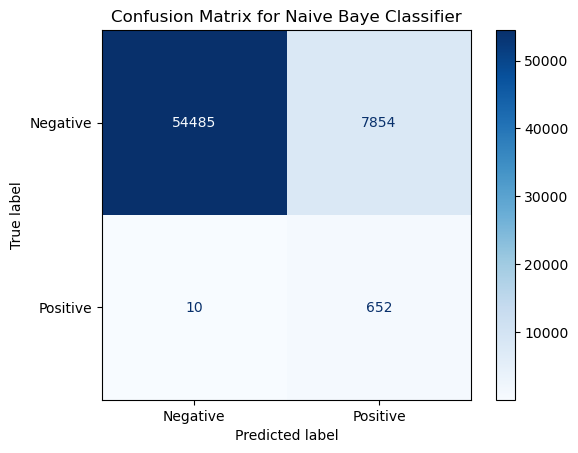

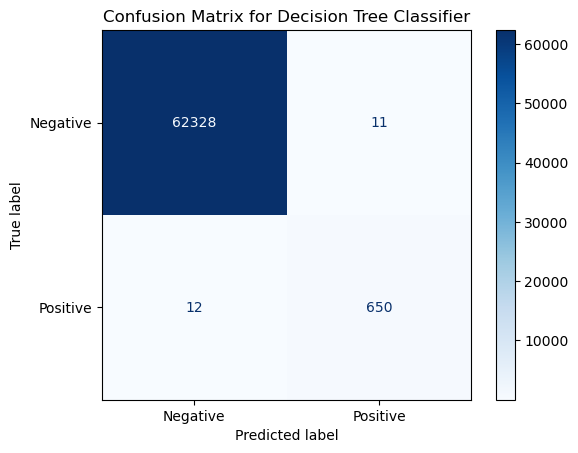

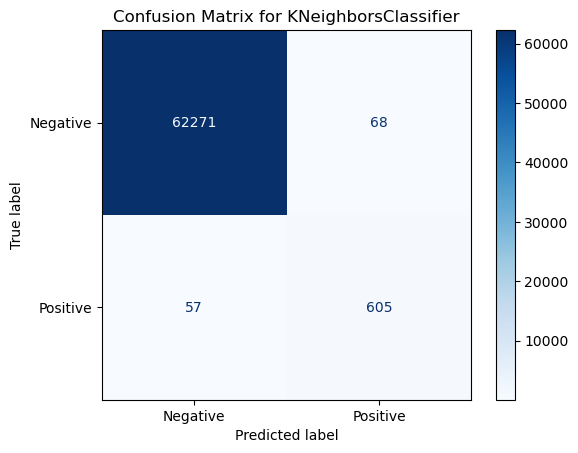

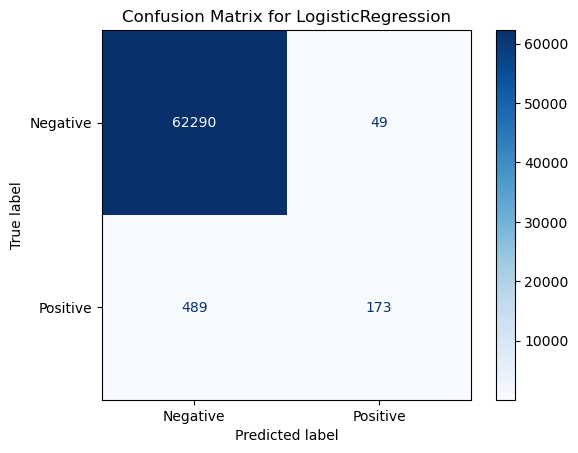

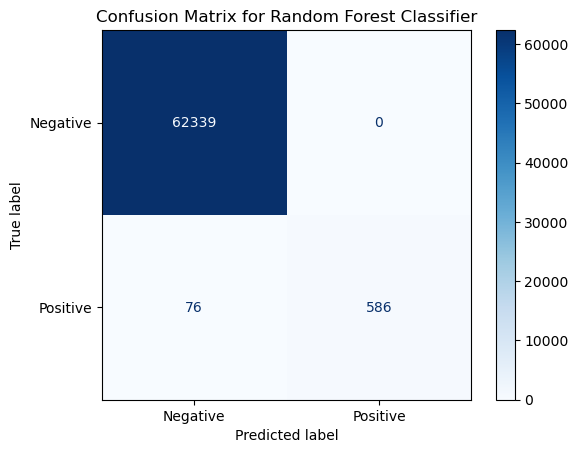

In [ ]:
# Plot confusion matrix for each model
for model_name, model in models:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Visualize feature importance for tree-based models


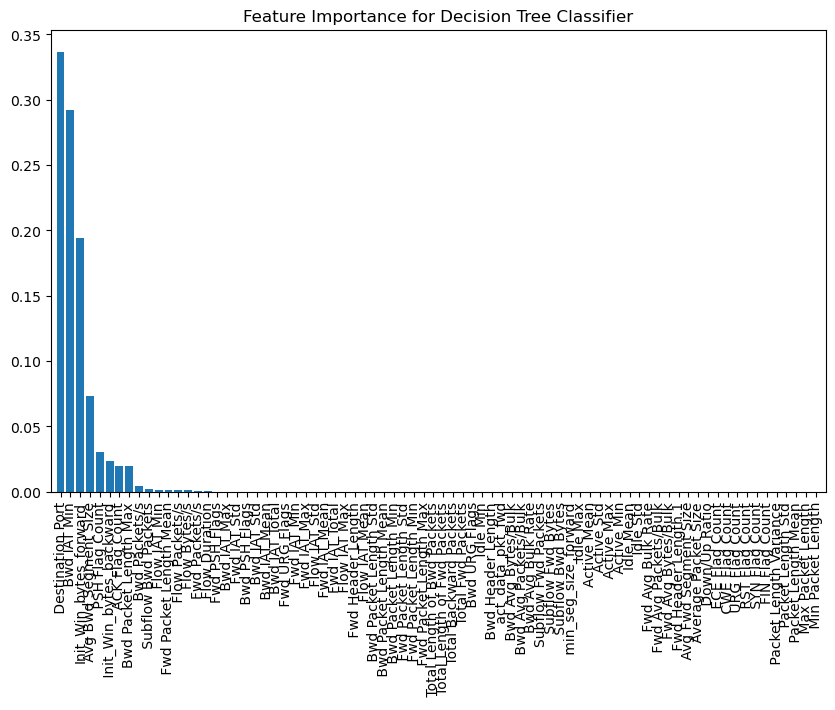

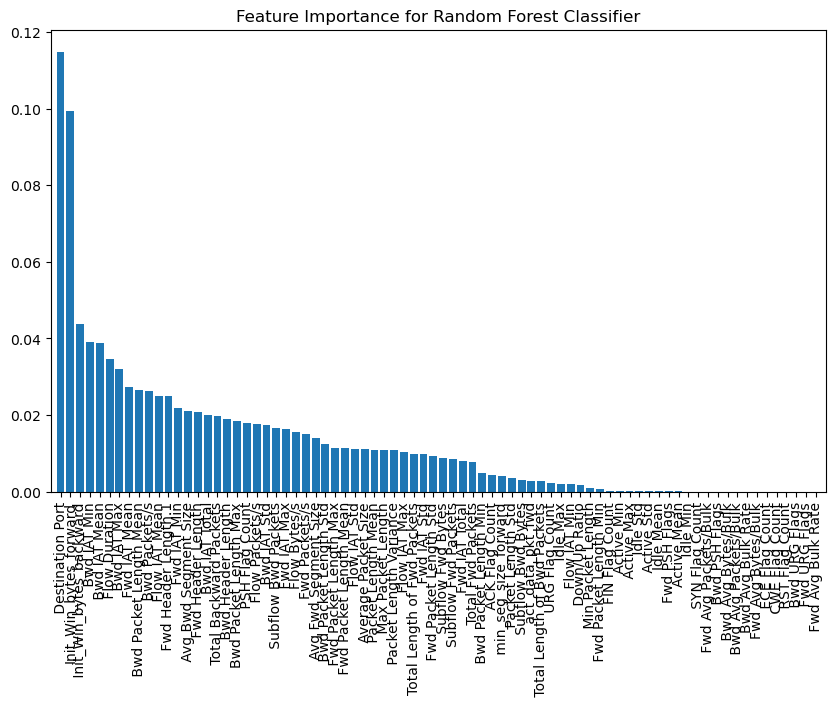

In [ ]:
# Visualize feature importance for tree-based models
for model_name, model in models:
    if 'Decision Tree' in model_name or 'Random Forest' in model_name:
        importances = model.feature_importances_
        feature_names = X.columns
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance for {model_name}')
        plt.bar(range(X.shape[1]), importances[indices], align='center')
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.show()


# Visualize learning curves for each model


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

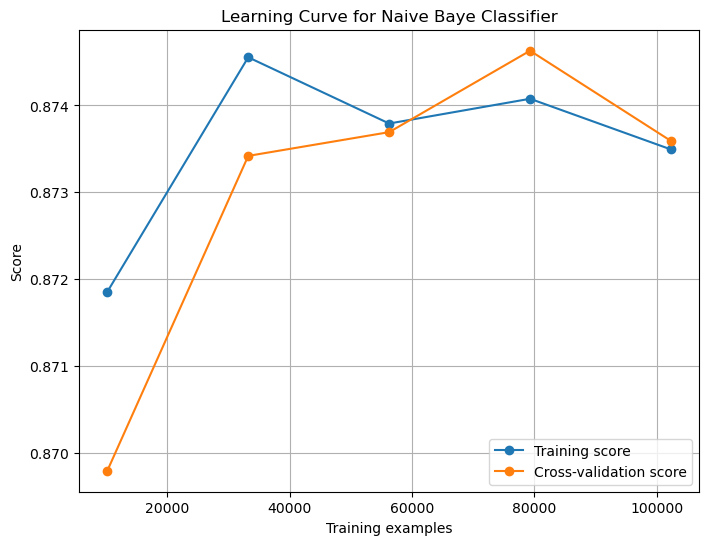

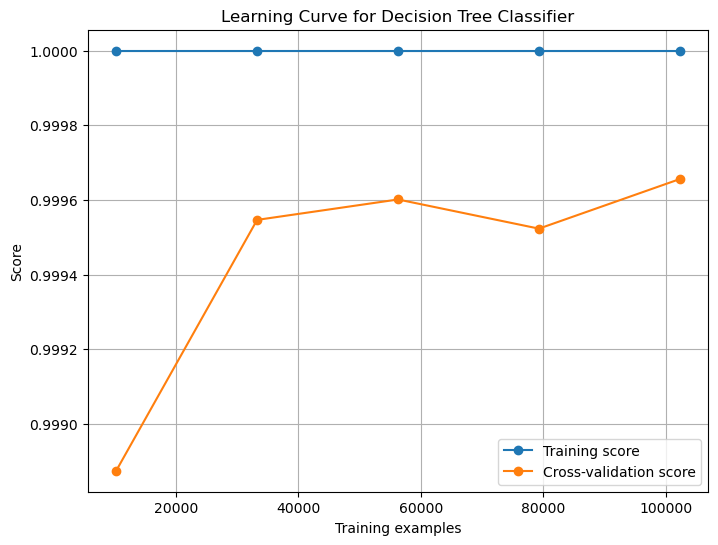

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

KeyboardInterrupt: 

In [ ]:
# Visualize learning curves for each model
from sklearn.model_selection import learning_curve

for model_name, model in models:
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()


# Create a grouped bar plot for comparing multiple metrics across models


In [ ]:
# Create a grouped bar plot for comparing multiple metrics across models
metrics_to_compare = ['Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall']
model_names = results_df['Model']
num_models = len(models)

# Set the width of each bar
bar_width = 0.15

# Generate an array of indices for the x-axis
indices = np.arange(len(model_names))

# Create a color map for different metrics
colors = ['b', 'g', 'm', 'y','c']

plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics_to_compare):
    # Calculate the x-axis positions for each metric
    x_positions = [ind + i * bar_width for ind in indices]

    # Extract metric values for each model
    metric_values = results_df[metric]

    # Plot the grouped bars for each metric
    plt.bar(x_positions, metric_values, width=bar_width, label=metric, color=colors[i])

# Set x-axis labels, ticks, and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(indices + (bar_width * (num_models - 1)) / 2, model_names, rotation=45)
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
results_df

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Load dataset
df = pd.read_csv("/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")

# Strip column names (fix leading spaces)
df.columns = df.columns.str.strip()

# Separate features and target
X = df.drop("Label", axis=1)
y = df["Label"]

# Replace inf and -inf with NaN, then drop rows with NaNs
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y[X.index]

# Optional: reset index
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------- Feature Selection ---------------------- #

# 1. ANOVA F-test
anova = SelectKBest(score_func=f_classif, k=10)
anova.fit(X_scaled, y)
anova_features = X.columns[anova.get_support()].tolist()

# 2. Mutual Information
mi = SelectKBest(score_func=mutual_info_classif, k=10)
mi.fit(X_scaled, y)
mi_features = X.columns[mi.get_support()].tolist()

# 3. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_scaled, y)
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
rf_features = rf_importances.nlargest(10).index.tolist()

# Combine unique features from all methods
final_features = list(set(anova_features + mi_features + rf_features))
print(f"Selected Features ({len(final_features)}): {final_features}")

# ---------------------- Train Final Model ---------------------- #

# Prepare final data
X_selected = X[final_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale selected features
scaler_final = StandardScaler()
X_train_scaled = scaler_final.fit_transform(X_train)
X_test_scaled = scaler_final.transform(X_test)

# Train classifier
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = final_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# ---------------------- Save Model and Scaler ---------------------- #

joblib.dump(final_model, "model.pkl")
joblib.dump(scaler_final, "scaler.pkl")
joblib.dump(final_features, "selected_features.pkl")

print("Model, scaler, and selected features saved.")


/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [31 32 33 49 56 57 58 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Selected Features (22): ['Fwd IAT Max', 'Init_Win_bytes_backward', 'Min Packet Length', 'Bwd Packet Length Mean', 'Avg Fwd Segment Size', 'Packet Length Variance', 'Bwd Packet Length Min', 'PSH Flag Count', 'Flow Duration', 'Bwd IAT Min', 'Avg Bwd Segment Size', 'Flow Packets/s', 'Init_Win_bytes_forward', 'Packet Length Mean', 'Subflow Bwd Bytes', 'min_seg_size_forward', 'URG Flag Count', 'Average Packet Size', 'Bwd Packets/s', 'Bwd IAT Mean', 'Packet Length Std', 'Destination Port']
Accuracy: 0.9997
Model, scaler, and selected features saved.


In [ ]:
top10_features = [
    'Fwd IAT Max',
    'Init_Win_bytes_backward',
    'Min Packet Length',
    'Bwd Packet Length Mean',
    'Avg Fwd Segment Size',
    'Packet Length Variance',
    'Bwd Packet Length Min',
    'PSH Flag Count',
    'Flow Duration',
    'Bwd IAT Min'
]


In [ ]:
X_top10 = X[top10_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top10)

# Train model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save
joblib.dump(model, 'rf_model10.pkl')
joblib.dump(scaler, 'scaler10.pkl')
joblib.dump(top10_features, 'selected_features10.pkl')


['selected_features10.pkl']

In [ ]:
pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /opt/conda/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, Boruta, category-encoders, cesium, eli5, esda, fastai, gplearn, hep-ml, hmmlearn, hpsklearn, hypertools, imbalanced-learn, kmapper, kmodes, librosa, lightgbm, lime, mapclassify, mlxtend, nilearn, pynndescent, qudida, rgf-python, scattertext, scikit-learn-intelex, scikit-optimize, scikit-plot, segregation, shap, sklearn-pandas, spopt, spreg, TPOT, tsfresh, umap-learn, vecstack, woodwork, Wordbatch, yellowbrick
Note: you may need to restart the kernel to use updated packages.


In [ ]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
df['Label'].value_counts()

BENIGN    189067
Bot         1966
Name: Label, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import joblib

# Load dataset
df = pd.read_csv("/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Top 10 selected features
top10_features = [
    'Fwd IAT Max', 'Init_Win_bytes_backward', 'Min Packet Length', 'Bwd Packet Length Mean',
    'Avg Fwd Segment Size', 'Packet Length Variance', 'Bwd Packet Length Min', 'PSH Flag Count',
    'Flow Duration', 'Bwd IAT Min'
]

# Filter data
df = df[top10_features + ['Label']]

# Remove infinities and NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Encode label (assuming 'BENIGN' and 'Bot' only)
df = df[df['Label'].isin(['BENIGN', 'Bot'])]
df['Label'] = df['Label'].map({'BENIGN': 0, 'Bot': 1})

# Split features/target
X = df[top10_features]
y = df['Label']

# Balance data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# Save components
joblib.dump(model, 'model_bal.pkl')
joblib.dump(scaler, 'scaler_bal.pkl')
joblib.dump(top10_features, 'selected_features_bal.pkl')
print("✅ Model, scaler, and selected features saved.")


Accuracy: 0.9921
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     37880
           1       0.98      1.00      0.99     37747

    accuracy                           0.99     75627
   macro avg       0.99      0.99      0.99     75627
weighted avg       0.99      0.99      0.99     75627

✅ Model, scaler, and selected features saved.


In [ ]:
#Streamlit nids
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load model and tools
model = joblib.load("knn_model.pkl")
scaler = joblib.load("knn_scaler.pkl")
label_encoder = joblib.load("knn_label_encoder.pkl")

# Features
features = [
    'Fwd IAT Max',
    'Init_Win_bytes_backward',
    'Min Packet Length',
    'Bwd Packet Length Mean',
    'Avg Fwd Segment Size',
    'Packet Length Variance',
    'Bwd Packet Length Min',
    'PSH Flag Count',
    'Flow Duration',
    'Bwd IAT Min'
]

st.set_page_config(page_title="KNN Intrusion Detection", layout="wide")
st.title("🔍 Network Intrusion Detection (KNN Model)")

st.markdown("This app uses *K-Nearest Neighbors* to predict intrusion types from network traffic features.")

def predict(df):
    X = scaler.transform(df[features])
    preds = model.predict(X)
    return label_encoder.inverse_transform(preds)

# Manual Input
with st.expander("🧾 Manual Feature Input"):
    user_input = {}
    for feat in features:
        user_input[feat] = st.number_input(feat, value=0.0)
    if st.button("🔍 Predict Intrusion"):
        df_input = pd.DataFrame([user_input])
        pred = predict(df_input)[0]
        st.success(f"Prediction: *{pred}*")

# CSV Batch Prediction
st.subheader("📂 Batch Prediction (CSV)")
file = st.file_uploader("Upload CSV", type="csv")
if file:
    df = pd.read_csv(file)
    df.columns = df.columns.str.strip()

    missing = [f for f in features if f not in df.columns]
    if missing:
        st.error(f"Missing features: {', '.join(missing)}")
    else:
        preds = predict(df)
        df["Prediction"] = preds
        st.dataframe(df)
        st.download_button("📥 Download Results", df.to_csv(index=False), file_name="knn_predictions.csv")

# Simulate
st.subheader("📡 Simulate Packet Detection")
if st.button("Start Simulation"):
    import time
    st.info("Simulating 10 packets...")
    progress = st.progress(0)

    for i in range(10):
        packet = pd.DataFrame([np.random.rand(len(features))], columns=features)
        pred = predict(packet)[0]
        st.write(f"📦 Packet {i+1}: *{pred}*")
        progress.progress((i + 1) / 10)
        time.sleep(1)

In [ ]:
#Training moel through KNN
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load your data
df = pd.read_csv("your_clean_data.csv")

features = [
    'Fwd IAT Max',
    'Init_Win_bytes_backward',
    'Min Packet Length',
    'Bwd Packet Length Mean',
    'Avg Fwd Segment Size',
    'Packet Length Variance',
    'Bwd Packet Length Min',
    'PSH Flag Count',
    'Flow Duration',
    'Bwd IAT Min'
]

X = df[features]
y = df['label']

# Encode and scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Save artifacts
joblib.dump(model, "knn_model.pkl")
joblib.dump(scaler, "knn_scaler.pkl")
joblib.dump(label_encoder, "knn_label_encoder.pkl")
🌐 2. Streamlit App using the Trained KNN Model
python
Copy
Edit
# streamlit_knn_nids.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load model and tools
model = joblib.load("knn_model.pkl")
scaler = joblib.load("knn_scaler.pkl")
label_encoder = joblib.load("knn_label_encoder.pkl")

# Features
features = [
    'Fwd IAT Max',
    'Init_Win_bytes_backward',
    'Min Packet Length',
    'Bwd Packet Length Mean',
    'Avg Fwd Segment Size',
    'Packet Length Variance',
    'Bwd Packet Length Min',
    'PSH Flag Count',
    'Flow Duration',
    'Bwd IAT Min'
]

st.set_page_config(page_title="KNN Intrusion Detection", layout="wide")
st.title("🔍 Network Intrusion Detection (KNN Model)")

st.markdown("This app uses **K-Nearest Neighbors** to predict intrusion types from network traffic features.")

def predict(df):
    X = scaler.transform(df[features])
    preds = model.predict(X)
    return label_encoder.inverse_transform(preds)

# Manual Input
with st.expander("🧾 Manual Feature Input"):
    user_input = {}
    for feat in features:
        user_input[feat] = st.number_input(feat, value=0.0)
    if st.button("🔍 Predict Intrusion"):
        df_input = pd.DataFrame([user_input])
        pred = predict(df_input)[0]
        st.success(f"Prediction: **{pred}**")

# CSV Batch Prediction
st.subheader("📂 Batch Prediction (CSV)")
file = st.file_uploader("Upload CSV", type="csv")
if file:
    df = pd.read_csv(file)
    df.columns = df.columns.str.strip()

    missing = [f for f in features if f not in df.columns]
    if missing:
        st.error(f"Missing features: {', '.join(missing)}")
    else:
        preds = predict(df)
        df["Prediction"] = preds
        st.dataframe(df)
        st.download_button("📥 Download Results", df.to_csv(index=False), file_name="knn_predictions.csv")

# Simulate
st.subheader("📡 Simulate Packet Detection")
if st.button("Start Simulation"):
    import time
    st.info("Simulating 10 packets...")
    progress = st.progress(0)

    for i in range(10):
        packet = pd.DataFrame([np.random.rand(len(features))], columns=features)
        pred = predict(packet)[0]
        st.write(f"📦 Packet {i+1}: **{pred}**")
        progress.progress((i + 1) / 10)